# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [2]:
# Your code to explore data and train a regression model

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
# Exploring Data
data.describe()




,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [5]:
data.dtypes

transaction_date            float64
house_age                   float64
transit_distance            float64
local_convenience_stores      int64
latitude                    float64
longitude                   float64
price_per_unit              float64
dtype: object

1. Since We don't have any null or non-numeric values we can just maybe scale the data and then go straight to feature engineering


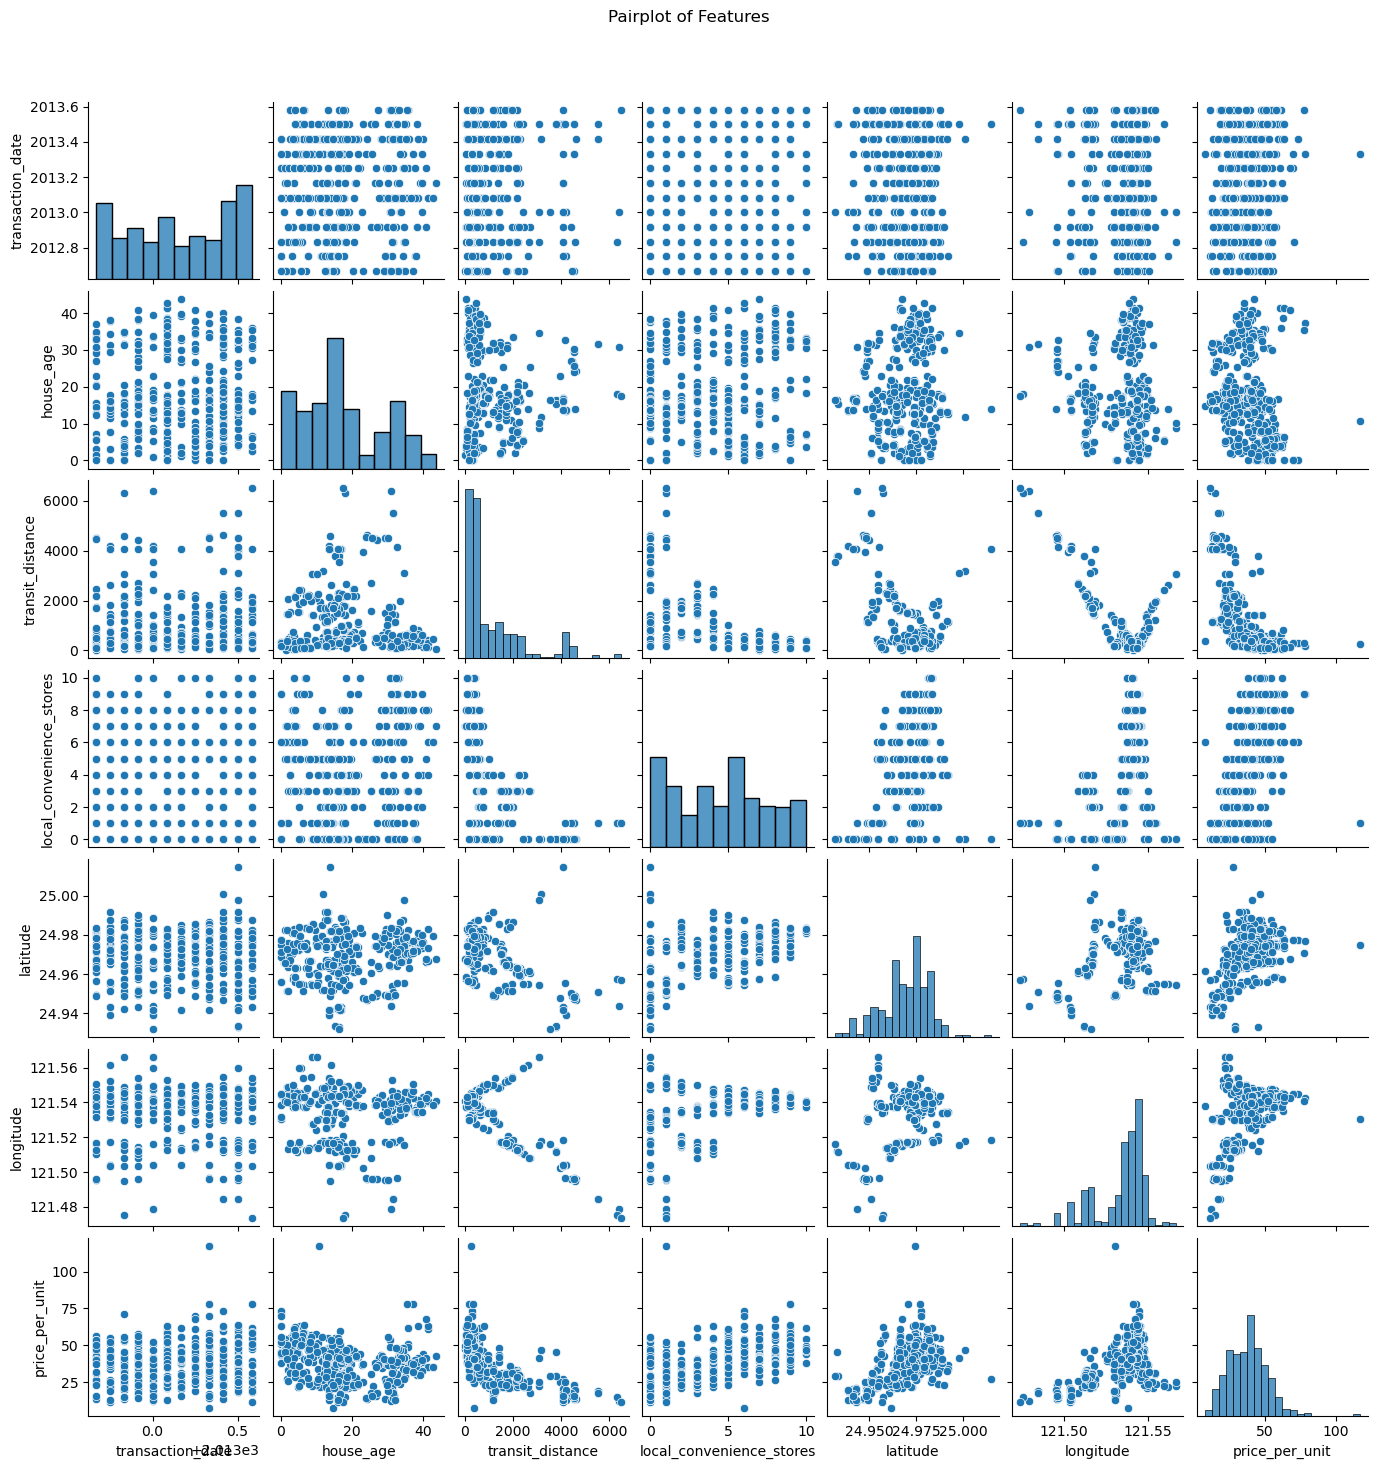

In [6]:

sns.pairplot(data,height=2)
plt.suptitle("Pairplot of Features",y=1.05)
plt.show()

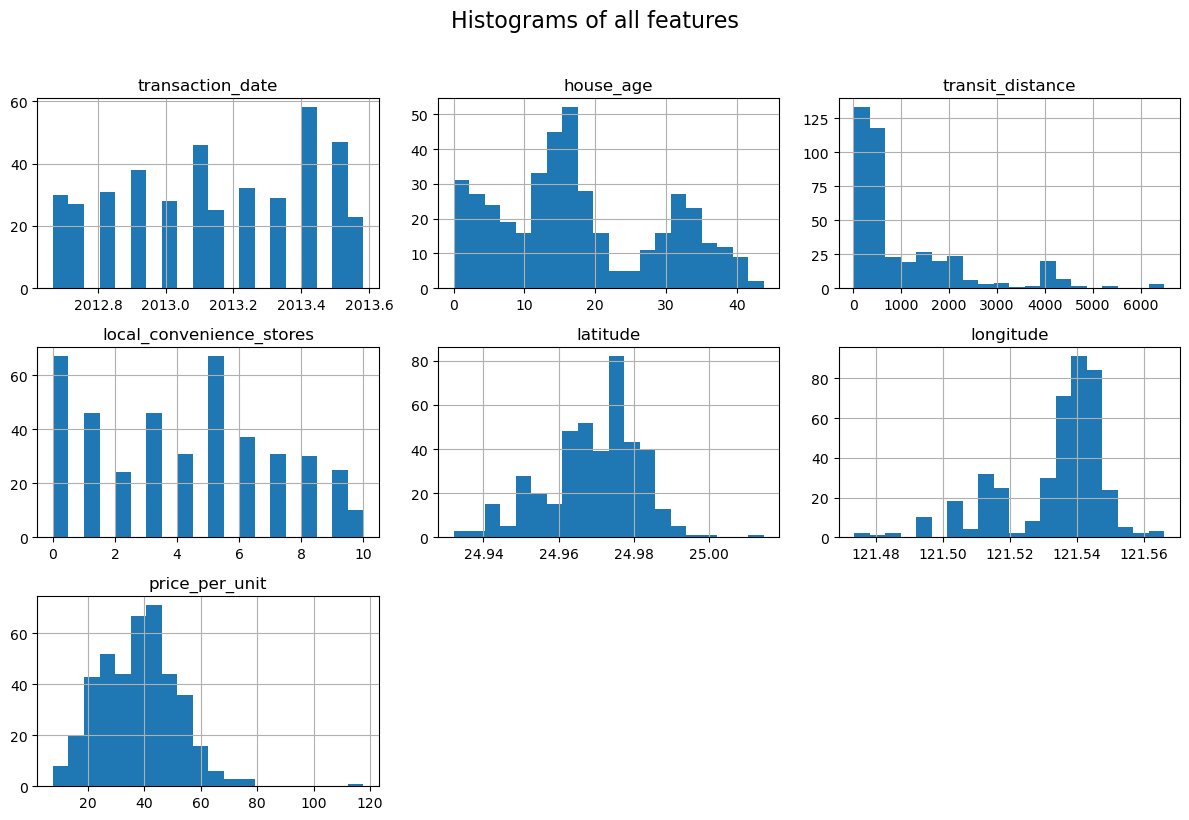

In [7]:


data.hist(figsize=(12,8),bins=20)
plt.suptitle("Histograms of all features",fontsize=16,y=1.02)
plt.tight_layout()

<Axes: xlabel='price_per_unit', ylabel='Count'>

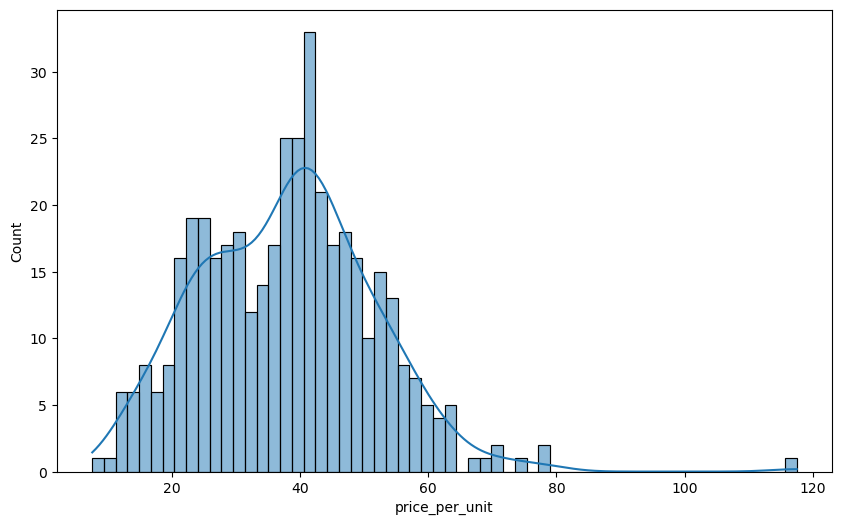

In [8]:
#Lets see how the distribution of price is 

plt.figure(figsize=(10,6))
sns.histplot(data.price_per_unit,bins=60,kde=True)



<Axes: xlabel='price_per_unit', ylabel='Count'>

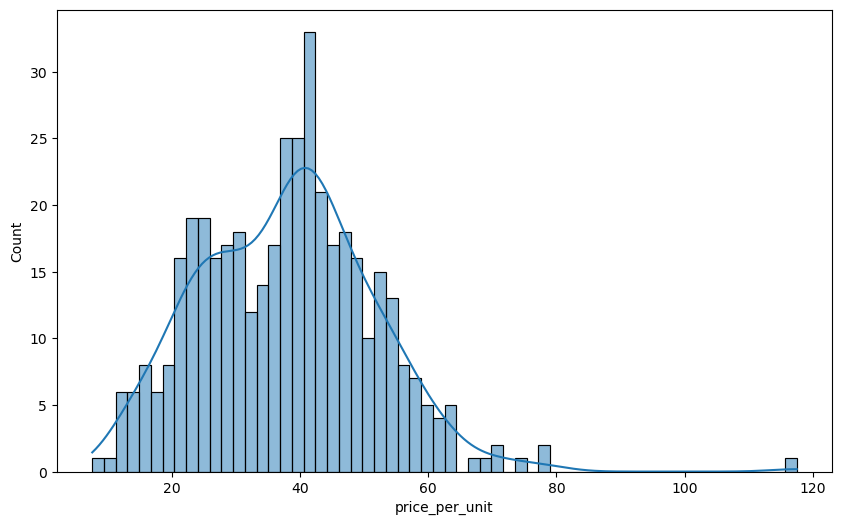

In [9]:
# Lets see if there is an skewness and then transform the data

from scipy.stats import skew
if skew (data.price_per_unit)>=0.8:
    data["price_per_unit"]=np.log1p(data.price_per_unit)


plt.figure(figsize=(10,6))
sns.histplot(data.price_per_unit,bins=60,kde=True)


1. Since our policy did not transform the data we can say that our data is normally distributed

* Lets look at some relationships of eaach features


In [10]:
# Lets first copy our data because we might now add or extract some data

copy_data=data.copy()

In [11]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X,y):
    mi_scores=mutual_info_regression(X,y)
    mi_scores=pd.Series(mi_scores,name="MI_SCORES",index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [12]:
mi_scores=make_mi_scores(copy_data.drop("price_per_unit",axis=1),copy_data["price_per_unit"])
mi_scores

longitude                   0.664392
transit_distance            0.641923
latitude                    0.554330
local_convenience_stores    0.399412
house_age                   0.318619
transaction_date            0.000000
Name: MI_SCORES, dtype: float64

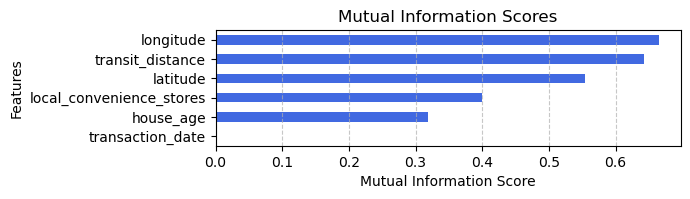

In [13]:
def mi_score_plot(mi_score):
    plt.figure(figsize=(6,(0.25)*len(mi_score)))
    mi_score.plot(kind="barh",color="royalblue")
    plt.xlabel("Mutual Information Score")
    plt.ylabel("Features")
    plt.title("Mutual Information Scores")
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    

mi_score_plot(mi_scores)    

Text(0.5, 1.0, 'latitude vs price_per_unit')

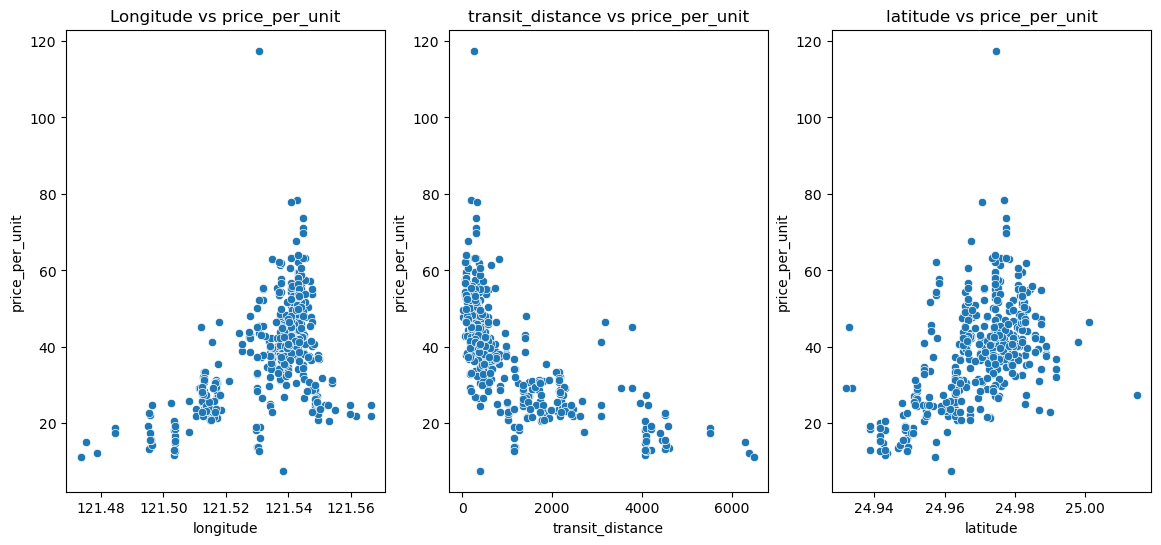

In [14]:
Most_important_features=["longitude","transit_distance","latitude"]
fig, axes=plt.subplots(1,3,figsize=(14,6))
sns.scatterplot(x=copy_data.longitude,y=copy_data.price_per_unit,ax=axes[0])
axes[0].set_title("Longitude vs price_per_unit")
sns.scatterplot(x=copy_data.transit_distance,y=copy_data.price_per_unit,ax=axes[1])
axes[1].set_title("transit_distance vs price_per_unit")
sns.scatterplot(x=copy_data.latitude,y=copy_data.price_per_unit,ax=axes[2])
axes[2].set_title("latitude vs price_per_unit")




In [15]:
# Outlier Detection using Spearman 

def spearman(df,features):
    spr=pd.DataFrame()
    spr["Features"]=features
    spr["Spearman"]=[df[i].corr(df["price_per_unit"],"spearman") for i  in features ]
    spr=spr.sort_values("Spearman")

    plt.figure(figsize=(6,0.25*len(features)))
    sns.barplot(data=spr,y="Features",x="Spearman",orient="h",palette=sns.color_palette("deep"))
    plt.title("Spearman Correlation with price_per_unit")
    plt.show()
    

C:\Users\semih\AppData\Local\Temp\ipykernel_20532\764700453.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spr,y="Features",x="Spearman",orient="h",palette=sns.color_palette("deep"))
C:\Users\semih\AppData\Local\Temp\ipykernel_20532\764700453.py:10: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=spr,y="Features",x="Spearman",orient="h",palette=sns.color_palette("deep"))


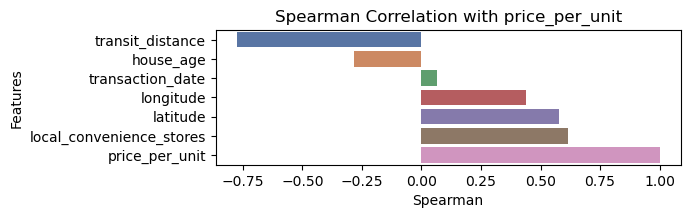

In [16]:
spearman(copy_data,copy_data.columns)

In [17]:
# Lets remove highly correalated transit_distance feature
copy_data.drop("transit_distance",axis=1)



,transaction_date,house_age,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,10,24.98298,121.54024,37.9
1,2012.917,19.5,9,24.98034,121.53951,42.2
2,2013.583,13.3,5,24.98746,121.54391,47.3
3,2013.500,13.3,5,24.98746,121.54391,54.8
4,2012.833,5.0,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,2013.000,13.7,0,24.94155,121.50381,15.4
410,2012.667,5.6,9,24.97433,121.54310,50.0
411,2013.250,18.8,7,24.97923,121.53986,40.6
412,2013.000,8.1,5,24.96674,121.54067,52.5


In [18]:
## Feature Seleciton
from sklearn.feature_selection import mutual_info_regression,SelectPercentile

X=copy_data.drop("price_per_unit",axis=1)
y=copy_data["price_per_unit"]

Feature_selection=SelectPercentile(score_func=mutual_info_regression,percentile=70)
X_train_selected=Feature_selection.fit_transform(X,y)

selected_features=X.columns[Feature_selection.get_support()]

 # X_test=test_set.drop("SalePrice",axis=1)
 # X_test_selected=X_test[selected_features]

print(f'X_train shape           : {X.shape}')
print(f'X_train_selected shape  : {X_train_selected.shape}')
print(f'Selected Features train :\n{list(selected_features)}')

X_train shape           : (414, 6)
X_train_selected shape  : (414, 4)
Selected Features train :
['transit_distance', 'local_convenience_stores', 'latitude', 'longitude']


In [19]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X_train_selected,y,test_size=0.2)
print(f"X_train shape : {X_train.shape}")
print(f"X_val shape         : {X_val.shape}")
print(f"y_train_final shape : {y_train.shape}")
print(f"y_val shape         : {y_val.shape}")

X_train shape : (331, 4)
X_val shape         : (83, 4)
y_train_final shape : (331,)
y_val shape         : (83,)


In [20]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor



def train_model(model_name):
    if model_name =="Lasso":
        model=Lasso(0.001)
    elif model_name=="Ridge":
        model=Ridge(0.001)
    elif model_name=="ElasticNet":
        model=ElasticNet(0.001)
    elif model_name=="RandomForestRegressor":
        model=RandomForestRegressor(random_state=0)
    elif model_name=="XGBRegressor":
        model=XGBRegressor()
    else:print("Invalid model name")

    model.fit(X_train,y_train)

    print(f'{model_name.capitalize()}  Train Score       : {model.score(X_train, y_train)*100:.2f} %')
    print(f'{model_name.capitalize()}  Validation Score  : {model.score(X_val , y_val)*100:.2f} %\n')
    
    return model

# Training some models


In [21]:
# Lasso
lasso=train_model("Lasso")
lasso

Lasso  Train Score       : 47.64 %
Lasso  Validation Score  : 68.09 %



Lasso(alpha=0.001)

In [22]:
ridge=train_model("Ridge")
ridge

Ridge  Train Score       : 47.64 %
Ridge  Validation Score  : 68.01 %



Ridge(alpha=0.001)

In [23]:
eln=train_model("ElasticNet")
eln

Elasticnet  Train Score       : 44.98 %
Elasticnet  Validation Score  : 72.05 %



ElasticNet(alpha=0.001)

In [24]:
RFR=train_model("RandomForestRegressor")
RFR

Randomforestregressor  Train Score       : 92.03 %
Randomforestregressor  Validation Score  : 83.83 %



RandomForestRegressor(random_state=0)

In [25]:
from xgboost.sklearn import XGBRFRegressor
XGB=train_model("XGBRegressor")
XGB

Xgbregressor  Train Score       : 96.77 %
Xgbregressor  Validation Score  : 73.96 %



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

def evaluate_model(y_true,y_pred,data_set="Dataset"):
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    rmse=root_mean_squared_error(y_true,y_pred)
    r2=r2_score(y_true,y_pred)

    print(f"model evaluation on {data_set}:")
    print(f"MAE:{mae: .5f} ")
    print(f"MSE:{mse: .5f} ")
    print(f"RMSE:{rmse: .5f} ")
    print(f"R2:{r2: .5f}  ")


In [27]:
# Predict on lasso
lasso_train_pred=lasso.predict(X_train)
lasso_valid_pred=lasso.predict(X_val)

evaluate_model(y_train,lasso_train_pred,"Training Set")
evaluate_model(y_val,lasso_valid_pred,"VALID Set")
    

model evaluation on Training Set:
MAE: 7.05235 
MSE: 97.44934 
RMSE: 9.87164 
R2: 0.47635  
model evaluation on VALID Set:
MAE: 5.83186 
MSE: 54.55239 
RMSE: 7.38596 
R2: 0.68087  


* We got RMSE:close to 9 but never 7 so lets try to get deeper into data
  

In [28]:
data2=data.copy()
data2

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# lets try to get rid of every single oulier


Text(0.5, 0.98, 'Price_per_unit Distribution')

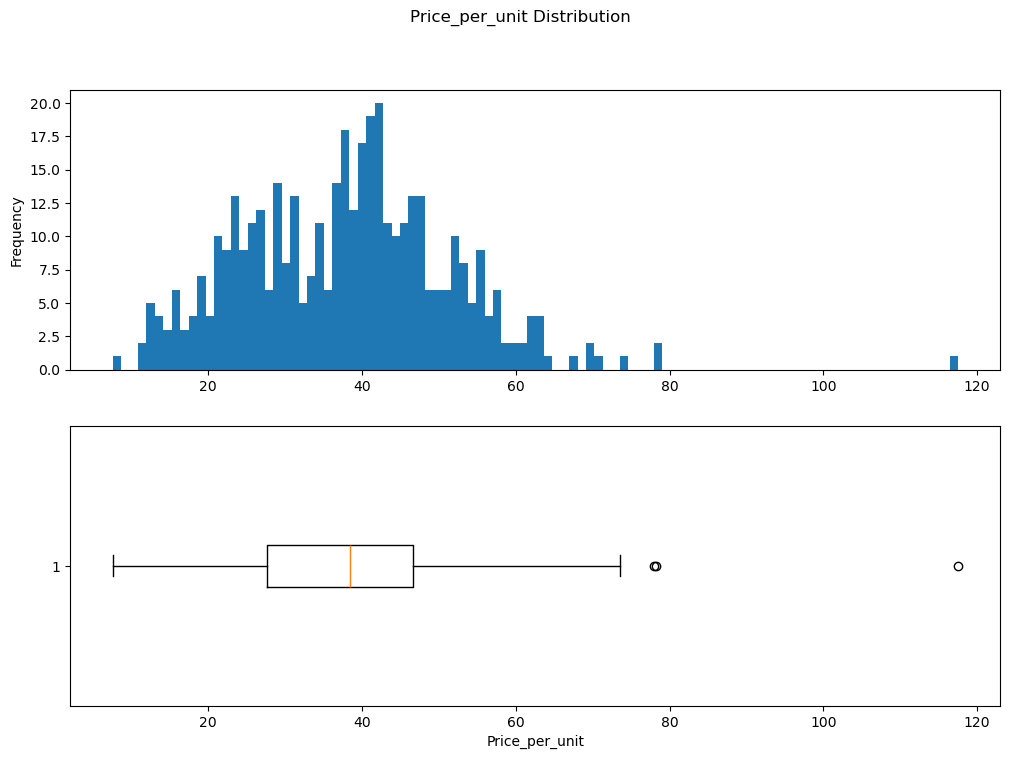

In [29]:
# price_per_unit outliers

fig, ax=plt.subplots(2,1,figsize=(12,8))

# Plot the hist

ax[0].hist(data2.price_per_unit,bins=100)
ax[0].set_ylabel("Frequency")

# Look for the boxplot

ax[1].boxplot(data2.price_per_unit,vert=False)
ax[1].set_xlabel("Price_per_unit")

fig.suptitle("Price_per_unit Distribution")


In [30]:
data2=data2[data2["price_per_unit"]<75]

data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          411 non-null    float64
 1   house_age                 411 non-null    float64
 2   transit_distance          411 non-null    float64
 3   local_convenience_stores  411 non-null    int64  
 4   latitude                  411 non-null    float64
 5   longitude                 411 non-null    float64
 6   price_per_unit            411 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.7 KB


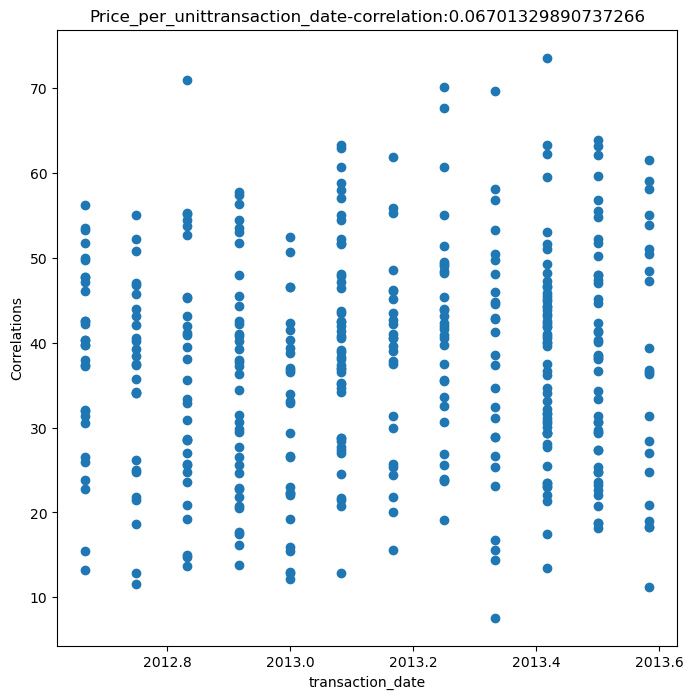

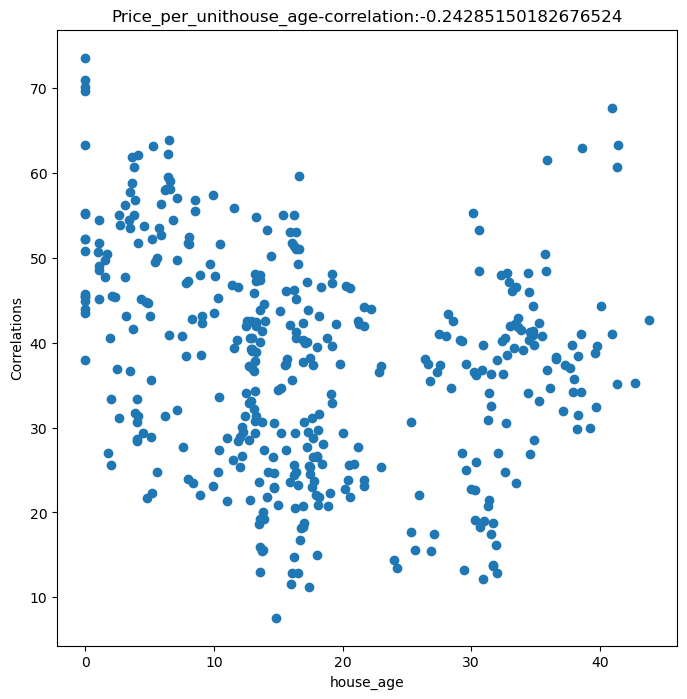

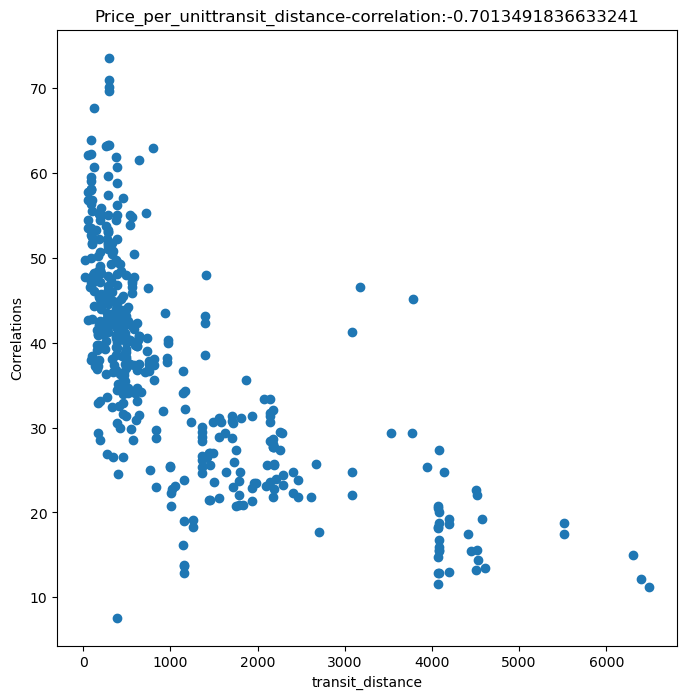

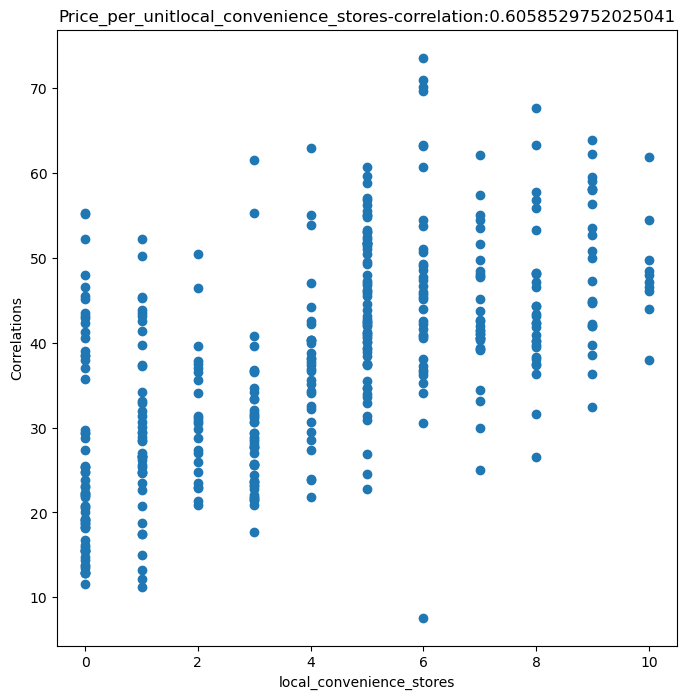

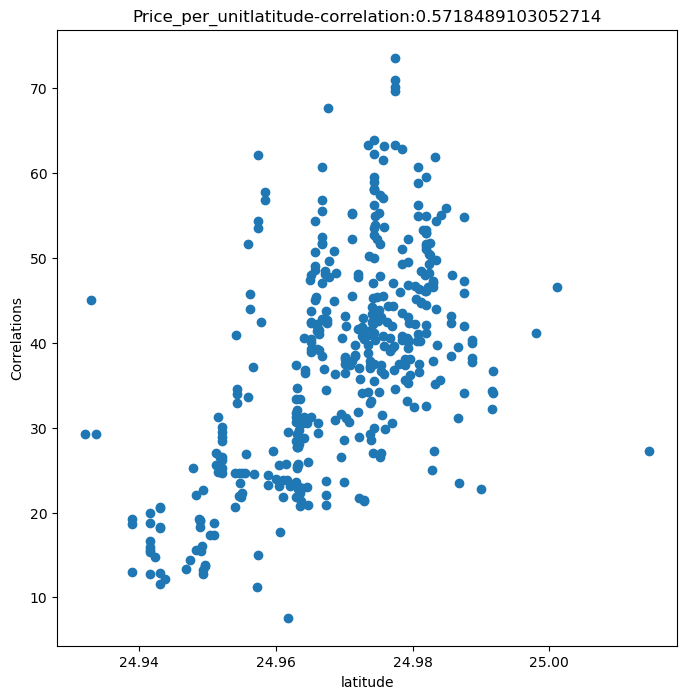

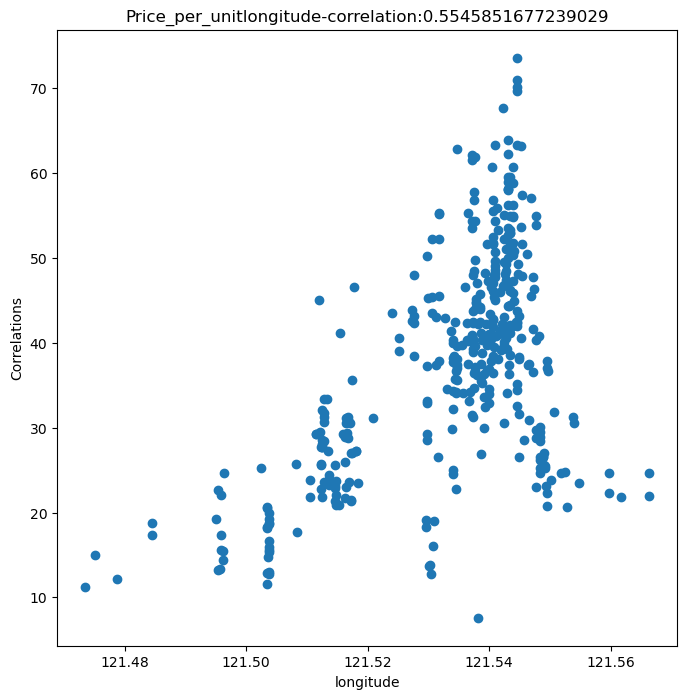

In [31]:
# Lets check the correlation of the columns

for col in data2[data2.columns[0:-1]]:
    fig=plt.figure(figsize=(8,8))
    ax=fig.gca()
    feature=data2[col]
    correlation=feature.corr(data2.price_per_unit)
    plt.scatter(x=feature,y=data2.price_per_unit)
    plt.xlabel(col)
    plt.ylabel("Correlations")
    ax.set_title("Price_per_unit"+col+"-correlation:"+str(correlation) )
    

* From this correlations we can say that local_convenience_stores and transcation_date seems like a categorical feature

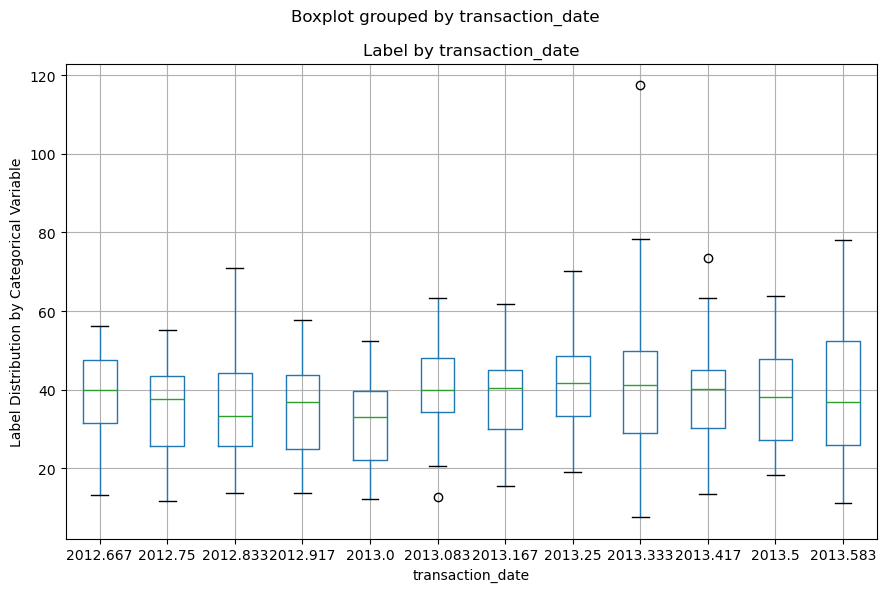

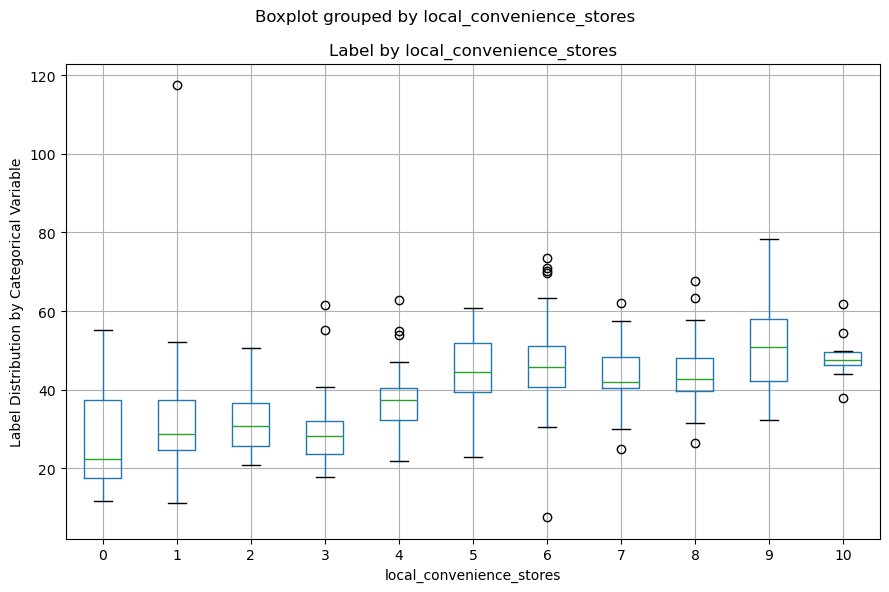

In [32]:
for col in data2[['transaction_date', 'local_convenience_stores']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Label Distribution by Categorical Variable")
    plt.tight_layout()


* Transcation_date does not give any information and it seems like it is not effecting the predictivity so we can remove it


In [33]:
X2,y2=data2[data2.columns[1:-1]].values,data2[data2.columns[-1]].values
_
X2_train,X2_val,y2_train,y2_val=train_test_split(X2,y2,test_size=0.7,random_state=0)

X2_train.shape,X2_val.shape,y2_train.shape,y2_val.shape


((123, 5), (288, 5), (123,), (288,))

# Preprocess the data and then train a model


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

numeric_features=[0,1,3,4]

numeric_transformer=Pipeline(steps=[("scaler",StandardScaler())])
preprocessor=ColumnTransformer(transformers=[("num",numeric_transformer,numeric_features),])
pipeline=Pipeline(steps=[("preprocessor",preprocessor),
                         ("regressor",RandomForestRegressor())])

model=pipeline.fit(X2_train,(y2_train))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])

# Evaluate the model


6.755313477408251


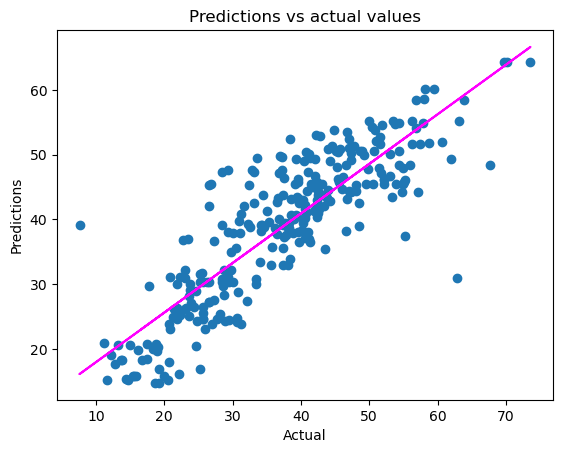

In [35]:
predictions=model.predict(X2_val)

RMSE=root_mean_squared_error(y2_val,predictions)
print(RMSE)

plt.scatter(y2_val,predictions)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Predictions vs actual values")

z = np.polyfit(y2_val, predictions, 1)
p = np.poly1d(z)
plt.plot(y2_val,p(y2_val), color='magenta')
plt.show()




# Save the model

In [36]:
import joblib

joblib.dump(model,"model.joblib")

['model.joblib']